# Import Library

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data Set

In [202]:
_titanic_data = pd.read_csv('titanic_train.csv')
_titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Information about data

In [203]:
_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [204]:
_titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [205]:
_titanic_data.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

# Data Visualization

<AxesSubplot:>

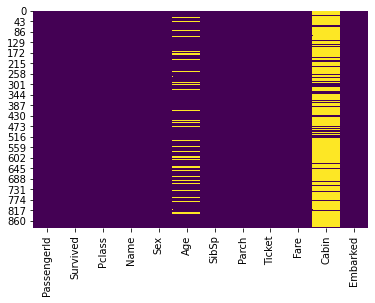

In [206]:
# Plotting Heatmap for check Null values
sns.heatmap(_titanic_data.isnull(), cmap='viridis',cbar=False)
# here via we can say that cabin and age have too much null valuess


<AxesSubplot:xlabel='Survived', ylabel='count'>

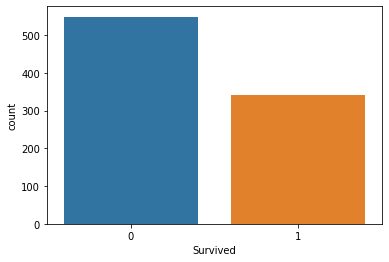

In [207]:
# countplot for check survived ratio
sns.countplot(x = 'Survived', data=_titanic_data)
# 0 means not survived 
# 1 means survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

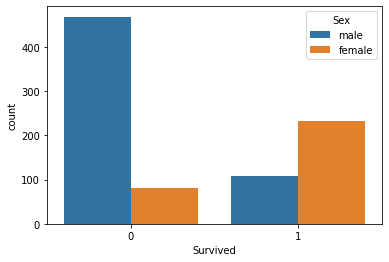

In [208]:
# if we want to check how many male and female are survived in this then we can plot another count plot for this
# here in this plot we can say males died more compare to women as well as women survived more as compare to men 
sns.countplot(x = 'Survived', data=_titanic_data, hue='Sex')


<AxesSubplot:xlabel='Survived', ylabel='count'>

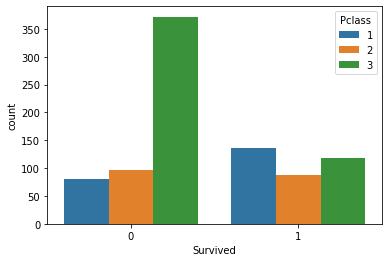

In [209]:
# here we can also plot a countplot in which we can choose features pClass(passenger class)
sns.countplot(x = 'Survived', data=_titanic_data, hue='Pclass')

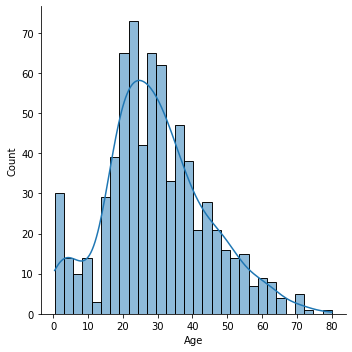

In [210]:
#  if we want to check the range of age then we can plot a distplot
sns.displot(_titanic_data['Age'].dropna(), bins = 30, kde = True)

<AxesSubplot:ylabel='Frequency'>

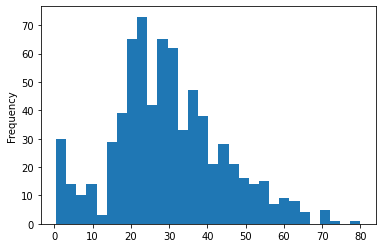

In [211]:
# another way to plot Hist
_titanic_data['Age'].plot.hist(bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

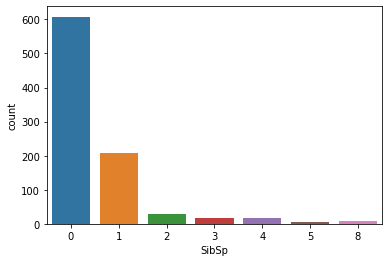

In [212]:
# sibsp (sibling and spouse)
sns.countplot(x = 'SibSp',data=_titanic_data)
# so here we can say that there is no much sibling or spouse on the ship

<AxesSubplot:>

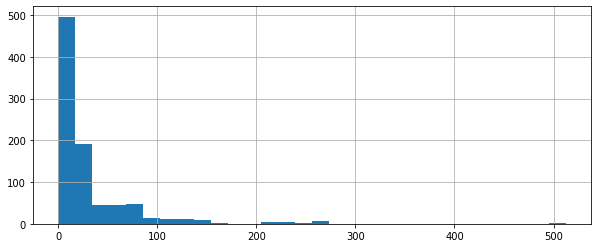

In [213]:
#now we will talk about ticket price
_titanic_data['Fare'].hist(bins=30, figsize=(10,4))

# Cleaning Data

## Process to fill Null Values
1. Imputation - fill mean  value of the particular column inplace of null Value
2. Or we can check the most of pessenger according to there class, belongs to which age group

In [214]:
_titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

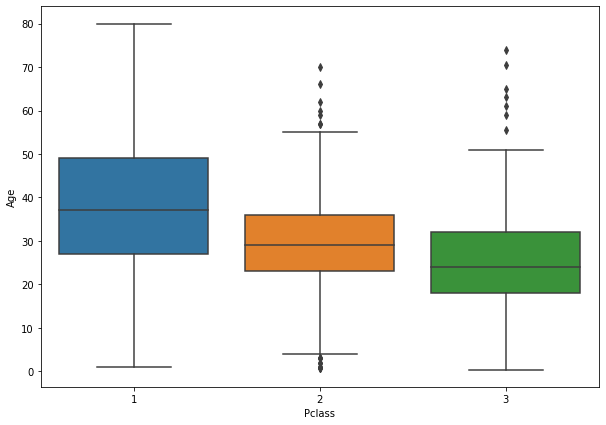

In [215]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass',y='Age',data=_titanic_data)


In [216]:
np.shape((2,20))

(2,)

In [217]:
# fill null value according to there Pclass by creating a function
def input_age(ages):
    Age = ages[0]
    Pclass =ages[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [218]:
_titanic_data['Age'] = _titanic_data[['Age','Pclass']].apply(input_age,axis=1)

## Drop Missing values

<AxesSubplot:>

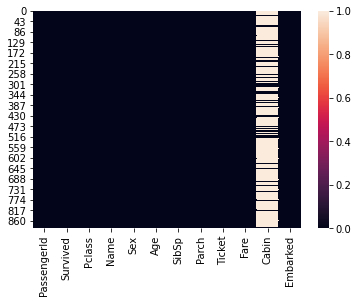

In [219]:
sns.heatmap(_titanic_data.isnull())

In [220]:
# here we know the cabin have too much null values so we can drop this values or we can drop this column
_titanic_data.drop('Cabin',axis=1,inplace=True)
_titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [221]:
# here we can check the total number of null values according to the columns 
_titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [222]:
# fill null values via fillna
_titanic_data.dropna(inplace=True)

# Categoricalfeatures to dummy Variable via pandas
1. In this data set we have various categorical values like sex, embarked(represent city) and we can    convert it via pandas dummy.
2. Multi-collinerity - This issue will heppen when one value is enough to describe the other value      for example if we have Sex Column with Male and female and we use dummy variable to convert          categorical  values then it will give 0 for frmale and 1 for male in that case one column is         enough to describe the person gender means if 0 then it is female and if 1 then it is male and       this phenomena is known as Multi-collinerity.  

In [223]:
# Conversion sex
sex = pd.get_dummies(_titanic_data['Sex'],drop_first=True)
sex.head()
# here for male == 1 & forfemale == 0

male
0     1
1     0
2     0
3     0
4     1

In [224]:
# # Conversion Embarked
Embarked = pd.get_dummies(_titanic_data['Embarked'],drop_first=True)
Embarked.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [225]:
# Conversion pclass 
# here Pclass is also a categorical value so we convert categorical into dummy variable
PsngrClass = pd.get_dummies(_titanic_data['Pclass'],drop_first=True)
PsngrClass

2  3
0    0  1
1    0  0
2    0  1
3    0  0
4    0  1
..  .. ..
886  1  0
887  0  0
888  0  1
889  0  0
890  0  1

[889 rows x 2 columns]

In [226]:
# Now after conversion we will concat or add this new columns into our dataframe
_titanic_data_new = pd.concat([_titanic_data,sex,Embarked,PsngrClass],axis=1)
_titanic_data_new

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  24.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  male  Q  S  2  3  
0        0         A/5 21171   7.2500        S     1  0  1  0  1  
1        0          PC 17599  71.2833        C     0  0  0  0  0  
2        0  STON/O2. 3101282   7.9250        S     0  0  1  0  1  
3        0            113803  53.1000        S     0  0  1  0  0  
4        0            373450   8.0500        S     1  0  1  0  1  
..     ...               ...      ...      ...   ... .. .. .. ..  
886      0            211536  13.0000        S     1  0  1  1  0  
887      0            112053  30.0000        S     0  0  1  0  0  
888      2        W./C. 6607  23.4500        S     0  0  1  0  1  
889      0            111369  30.0000        C     1  0  0  0  0  
890      0            370376   7.7500        Q     1  1  0  0  1  

[889 rows x 16 columns]

In [227]:
_titanic_data_new.drop(['Name','Sex','Pclass','Ticket','Embarked'],inplace=True,axis=1)

In [228]:
_titanic_data_new.head(5)

PassengerId  Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0            1         0  22.0      1      0   7.2500     1  0  1  0  1
1            2         1  38.0      1      0  71.2833     0  0  0  0  0
2            3         1  26.0      0      0   7.9250     0  0  1  0  1
3            4         1  35.0      1      0  53.1000     0  0  1  0  0
4            5         0  35.0      0      0   8.0500     1  0  1  0  1

In [229]:
# So sometimes data is numerical or we can say column is numerical but if it is not usefull then wec drop it in this case like  PassengerID
_titanic_data_new.drop(['PassengerId'],axis=1,inplace=True)


In [230]:
_titanic_data_new.tail(5)

Survived   Age  SibSp  Parch   Fare  male  Q  S  2  3
886         0  27.0      0      0  13.00     1  0  1  1  0
887         1  19.0      0      0  30.00     0  0  1  0  0
888         0  24.0      1      2  23.45     0  0  1  0  1
889         1  26.0      0      0  30.00     1  0  0  0  0
890         0  32.0      0      0   7.75     1  1  0  0  1

# train_test_split

In [231]:
X = _titanic_data_new.drop('Survived',axis=1)
y = _titanic_data_new['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Applying logistic Algorithm

In [244]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)


In [245]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [248]:
predict = log_model.predict(X_test)
predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

## Evalute or Evalution of our model

In [249]:
# classification report is use for precision, recall, f1 Score etc can be extract via classifiaction report
from sklearn.metrics import classification_report

In [250]:
# for classification Report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [251]:
# for confusion Matrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)


array([[150,  13],
       [ 33,  71]])